In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
my_path = '/home/hice1/amardia6/scratch/deepLearning/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.wav'

In [3]:
import librosa
audio_data = my_path
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(12860892,) 22050


In [4]:
import librosa
audio_data = '/home/hice1/amardia6/scratch/deepLearning/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(12860892,) 22050


In [5]:
librosa.load(audio_data, sr=44100)

(array([-3.0162973e-05,  5.4796663e-04,  6.8159797e-04, ...,
         9.4232650e-04,  8.3770044e-04,  4.5668421e-04], dtype=float32),
 44100)

In [6]:
import matplotlib.pyplot as plt
import librosa.display
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

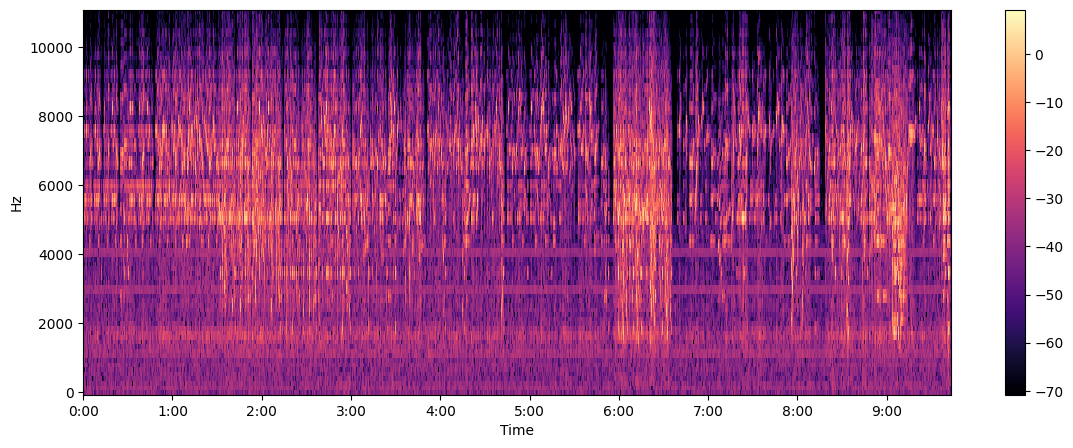

In [ ]:
X = librosa.cqt(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()